# Early Stopping Criteria

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tensorchiefs/dl_course_2025/blob/master/notebooks/07_training_criteria.ipynb)

**Task:**
In this Notebook you will see how early stopping is implemented to prevent overfitting and avoid uneccessary computational cost.


**Dataset:** We simulate some data

**Content:**
* load the original MNIST data and create a randomly pixel shuffled version of the data
* visualize samples of the orginal and shuffled version of the data
* use keras to train a CNN with the original and shuffled data and compare the perfomance on new unseen test data
* check if the local structure of the pixels within the images have an impact on the classification performance when you use a CNN




In [ ]:
# load required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import torch
import pandas as pd

print(f'Keras_version: {keras.__version__}')# 3.5.0
print(f'torch_version: {torch.__version__}')# 2.5.1+cu121
print(f'keras backend: {keras.backend.backend()}')


import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

: 

- lets create some data:

In [ ]:
X, y = make_classification(n_samples=2000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


df_train = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df_train['Target'] = y_train

df_val = pd.DataFrame(X_val, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df_val['Target'] = y_val

# Plotting a pair plot of the first two features and target for training data
plt.figure(figsize=(12, 6))
plt.scatter(df_train['Feature_0'], df_train['Feature_1'], c=df_train['Target'], cmap='viridis', alpha=0.7)
plt.title("Scatter Plot of Feature_0 vs Feature_1 (Training Data)")
plt.xlabel("Feature_0")
plt.ylabel("Feature_1")
plt.colorbar(label="Target")
plt.show()

- simple model:

In [9]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Setting Up Early Stopping Callback
# Early Stopping is a technique to prevent overfitting by monitoring validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)

In [11]:
# Training the Model with Early Stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5238 - loss: 0.6986 - val_accuracy: 0.7875 - val_loss: 0.5153
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4701 - val_accuracy: 0.8725 - val_loss: 0.3682
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.3406 - val_accuracy: 0.8775 - val_loss: 0.3034
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.2984 - val_accuracy: 0.8875 - val_loss: 0.2777
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8762 - loss: 0.2848 - val_accuracy: 0.8850 - val_loss: 0.2677
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.2688 - val_accuracy: 0.8875 - val_loss: 0.2638
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.2452 - val_accuracy: 0.8925 - val_loss: 0.2597
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8992 - loss: 0.2336 - val_accuracy: 0.8875 - val_loss:

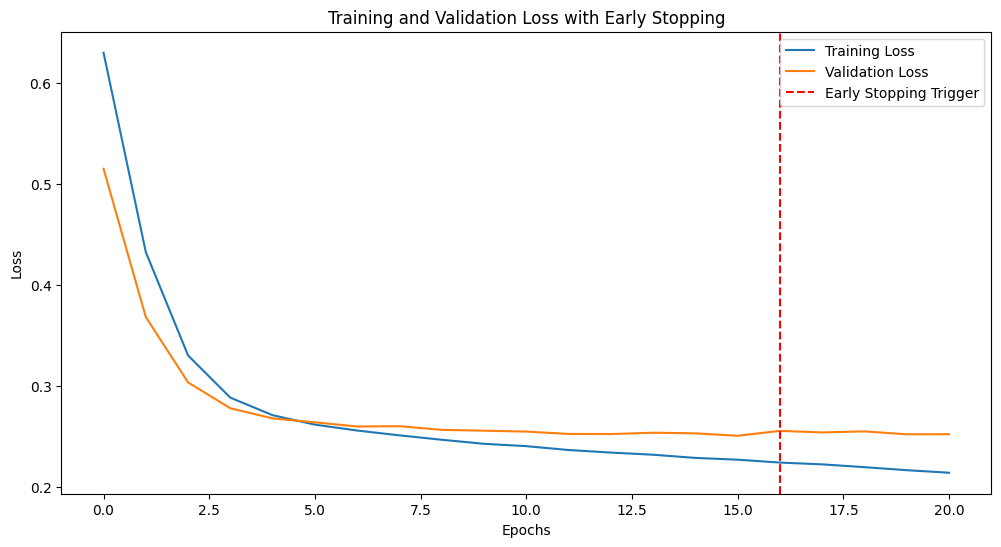

In [12]:
# Plotting Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(len(history.history['val_loss']) - 5, color='r', linestyle='--', label='Early Stopping Trigger')
plt.title('Training and Validation Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion
This notebook demonstrates the importance of early stopping as a stopping criterion in training.
It helps prevent overfitting by monitoring validation loss and stopping training when it no longer improves.